In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

breast_cancer_data = load_breast_cancer()

In [15]:
def average_knn_classifier(data, k_range: int, num_of_trials: int):
  '''
  Args:
  - data - this is the data which gets randomly split (this occurs `num_of_trials` times)
    Data Structure:
    - data.data
    - data.target
  - k_range (int) - gets turned into range(k_range - 1)
  - num_of_trials (int) - number of trials you want to average ove 
  '''

  score_at_k = np.zeros(k_range - 1)
  for _ in tqdm(range(num_of_trials)):
    training_data, validation_data, training_labels, validation_labels = train_test_split(data.data, data.target, test_size = 0.2)
    temp_score = []
    for k in range(1, k_range):
      classifier = KNeighborsClassifier(n_neighbors = k)
      classifier.fit(training_data, training_labels)
      score = classifier.score(validation_data, validation_labels)
      temp_score.append(score)

    temp_score = np.array(temp_score)
    score_at_k += temp_score
    plt.plot(range(k_range-1), temp_score, alpha=0.2)

  score_at_k /= num_of_trials

  plt.plot(range(k_range - 1), score_at_k)
  plt.xlabel('k')
  plt.ylabel('Validation Accuracy')

100%|██████████| 50/50 [00:46<00:00,  1.09it/s]


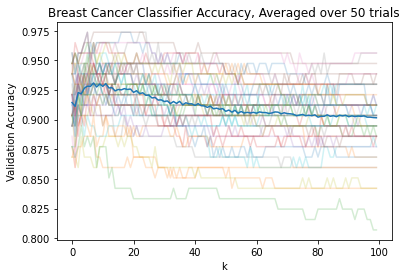

In [17]:
k_range = 101
num_of_trials = 50

average_knn_classifier(breast_cancer_data, k_range, num_of_trials)

plt.title(f'Breast Cancer Classifier Accuracy, Averaged over {num_of_trials} trials')
plt.show()